In [1]:
import numpy as np

def read_data(file_path):
    data = np.genfromtxt(file_path, delimiter=' ')
    input, output = data[:, :-1], data[:, -1]
    return input, output

train_data = "D2z.txt"
x_train, y_train = read_data(train_data)


In [14]:
# Generate a grid of test points
x1 = np.arange(-2, 2.1, 0.1)
x2 = np.arange(-2, 2.1, 0.1)
x1_test, x2_test = np.meshgrid(x1, x2)


# Flatten the meshgrid arrays and stack them
X_test_region = np.column_stack((x1_test.ravel(), x2_test.ravel()))



(1681, 2)


In [22]:
# Print the resulting array
print(np.sum(np.square(x_train - X_test_region[0]),axis =1))

[ 6.43667815  5.78035573 15.27592157  5.49440476 12.9412029   7.28548044
 10.93524202  3.3328332   6.33327598 12.32540006  5.16609511 11.12862111
 10.30430942 12.07600501  7.46709351  5.61102778  3.43262447  9.24863806
  9.4796794   6.76172593  6.30522218 16.06377072  8.15333522  4.71145659
  5.17232835  5.64065432  5.88678708  6.08103661  8.78490316  6.12249477
  6.44067701 10.8780184   7.96360394  5.10119456 10.90896209 12.2518918
  6.9622911   5.0517126  11.17797112  3.87590511 12.14491855  8.96707251
 10.58903059  7.25518754 12.850948    3.88511121 11.60555629 15.48458441
  5.59371222 16.09720109  4.83504546  4.74393785 11.43395003  5.90010943
  5.51761304  9.90804523  4.42924675 11.24298217  6.47614817  6.99508214
  3.39809662 11.81846491 12.04241657 16.6018094  11.88130211  6.2792072
 13.45986995  7.10163392  7.47793631 10.75637018  5.40001148 11.95098955
  6.96917458  6.92705698  6.09498124  9.55789421 14.18593038  5.8064589
  4.94875983 11.12672581  4.43343356  4.89973784 12.05

In [23]:
def knn_prediction(X_train, Y_train, X_test, k, type):
    predicted_values = np.zeros(X_test.shape[0])
    i = 0

    while i < X_test.shape[0]:
        # Calculate Euclidean distances
        distances = np.linalg.norm(X_train - X_test[i], axis=1)

        # Find the indices of the nearest neighbors
        nearest_indices = np.argsort(distances)[:k]

        if type == 'maj':
            # Get unique classes and their counts among the k nearest neighbors
            unique_classes, class_counts = np.unique(Y_train[nearest_indices], return_counts=True)

            # Find the index of the class with the highest count
            max_count_index = np.argmax(class_counts)

            # Predict the class with the highest count
            predicted_values[i] = unique_classes[max_count_index]

        elif type == 'mean':
            predicted_values[i] = np.mean(Y_train[nearest_indices])

        i += 1

    return predicted_values

In [24]:

Y_test_region = knn_prediction(x_train, y_train,  X_test_region, 1, 'maj')

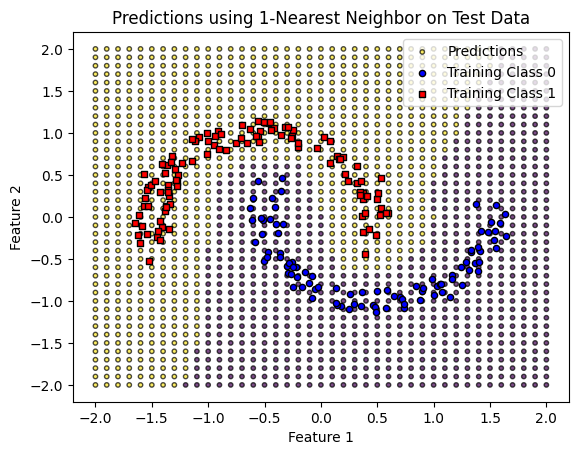

In [26]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the test set with different color and marker style
ax.scatter(X_test_region[:, 0], X_test_region[:, 1], c=Y_test_region, cmap='viridis', alpha=0.7, s=10, label='Predictions', edgecolors='k')

# Plot training set for Class 0 with different marker style
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker='o', color='blue', label='Training Class 0', s=20, edgecolors='k')

# Plot training set for Class 1 with different marker style
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker='s', color='red', label='Training Class 1', s=20, edgecolors='k')

# Add legend
ax.legend()

# Set labels for x and y axis
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set title of the plot
plt.title("Predictions using 1-Nearest Neighbor on Test Data")

# Display the plot
plt.show()


In [58]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 1:-1].values
    y = data.iloc[:, -1].values
    return X, y


x_train, y_train = load_data("emails.csv")



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
precision = []
recall = []
i = 0

while i < 5:
  x_test = x_train[i*1000:(i+1)*1000, :]
  y_test = y_train[i*1000:(i+1)*1000]
  mask = np.ones(len(x_train), dtype=bool)
  mask[i*1000:(i+1)*1000] = False

  x_train_new = x_train[mask]
  y_train_new = y_train[mask]
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(x_train_new, y_train_new)
  Y_pred = knn.predict(x_test)
  #Y_pred = knn_prediction(x_train_new, y_train_new, x_test, 1, 'maj')

  acc = accuracy_score(y_test, Y_pred)
  prec = precision_score(y_test, Y_pred, average='binary')  # Assuming binary classification
  rec = recall_score(y_test, Y_pred, average='binary')  # Assuming binary classification

  accuracy.append(acc)
  precision.append(prec)
  recall.append(rec)

  i += 1

In [50]:
# Print the table header
print("{:<10} {:<15} {:<15} {:<15}".format("Fold", "Accuracy", "Precision", "Recall"))

# Populate the table with data
for fold, (acc, prec, rec) in enumerate(zip(accuracy, precision, recall)):
    print("{:<10} {:<15} {:<15} {:<15}".format(fold+1, acc, prec, rec))

Fold       Accuracy        Precision       Recall         
1          0.825           0.6544943820224719 0.8175438596491228
2          0.853           0.6857142857142857 0.8664259927797834
3          0.862           0.7212121212121212 0.8380281690140845
4          0.851           0.7164179104477612 0.8163265306122449
5          0.775           0.6057441253263708 0.7581699346405228


In [61]:
from scipy.special import expit

class LogisticRegression:
    def __init__(self, learning_rate, num_steps=100):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.weights = None

    def sigmoid(self, z):
        return expit(z)

    def train(self, X, Y):
        num_samples, num_features = X.shape[0], X.shape[1]
        self.weights = np.zeros(num_features)

        for _ in range(self.num_steps):
            y_pred = self.sigmoid(np.matmul(X, self.weights))
            gradient = np.matmul(X.T, (y_pred - Y)) / num_samples
            self.weights = self.weights - self.learning_rate * gradient

    def predict(self, X):
        y_pred = self.sigmoid(np.matmul(X, self.weights))
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        return y_pred

    def get_probability(self, X):
        return self.sigmoid(np.matmul(X, self.weights))


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
precision = []
recall = []
i = 0

while i < 5:
  x_test = x_train[i*1000:(i+1)*1000, :]
  y_test = y_train[i*1000:(i+1)*1000]
  mask = np.ones(len(x_train), dtype=bool)
  mask[i*1000:(i+1)*1000] = False

  x_train_new = x_train[mask]
  y_train_new = y_train[mask]
  knn = LogisticRegression(0.02,1000)
  knn.train(x_train_new, y_train_new)
  Y_pred = knn.predict(x_test)
  #Y_pred = knn_prediction(x_train_new, y_train_new, x_test, 1, 'maj')

  acc = accuracy_score(y_test, Y_pred)
  prec = precision_score(y_test, Y_pred, average='binary')  # Assuming binary classification
  rec = recall_score(y_test, Y_pred, average='binary')  # Assuming binary classification

  accuracy.append(acc)
  precision.append(prec)
  recall.append(rec)

  i += 1

In [57]:
# Print the table header
print("{:<10} {:<15} {:<15} {:<15}".format("Fold", "Accuracy", "Precision", "Recall"))

# Populate the table with data
for fold, (acc, prec, rec) in enumerate(zip(accuracy, precision, recall)):
    print("{:<10} {:<15} {:<15} {:<15}".format(fold+1, acc, prec, rec))

Fold       Accuracy        Precision       Recall         
1          0.909           0.8233333333333334 0.8666666666666667
2          0.894           0.8352941176470589 0.7689530685920578
3          0.883           0.8957345971563981 0.6654929577464789
4          0.854           0.685           0.9319727891156463
5          0.851           0.79182156133829 0.696078431372549


K Value:  1  Avg. Accuracy:  0.8332
K Value:  3  Avg. Accuracy:  0.8422000000000001
K Value:  5  Avg. Accuracy:  0.8408
K Value:  7  Avg. Accuracy:  0.8462
K Value:  10  Avg. Accuracy:  0.8556000000000001


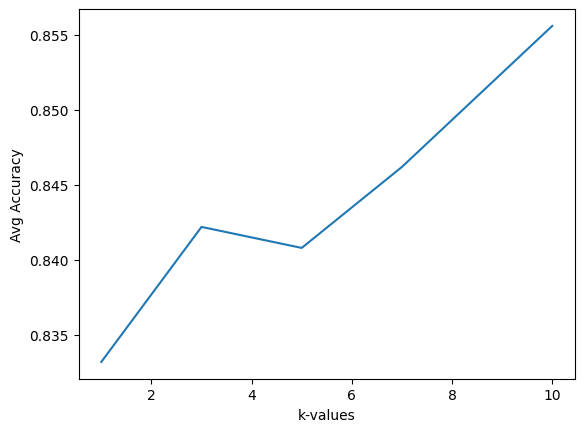

In [60]:
k_values = [1, 3, 5, 7, 10]

result = []
for k in k_values:

  accuracy = []
  i = 0

  while i < 5:
    x_test = x_train[i*1000:(i+1)*1000, :]
    y_test = y_train[i*1000:(i+1)*1000]
    mask = np.ones(len(x_train), dtype=bool)
    mask[i*1000:(i+1)*1000] = False

    x_train_new = x_train[mask]
    y_train_new = y_train[mask]
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_new, y_train_new)
    Y_pred = knn.predict(x_test)
    #Y_pred = knn_prediction(x_train_new, y_train_new, x_test, 1, 'maj')

    acc = accuracy_score(y_test, Y_pred)
    accuracy.append(acc)
    i += 1
  print("K Value: ",k," Avg. Accuracy: ", np.mean(accuracy))
  result.append(np.mean(accuracy))

plt.plot(k_values, result)
plt.xlabel("k-values")
plt.ylabel("Avg Accuracy")
plt.show()

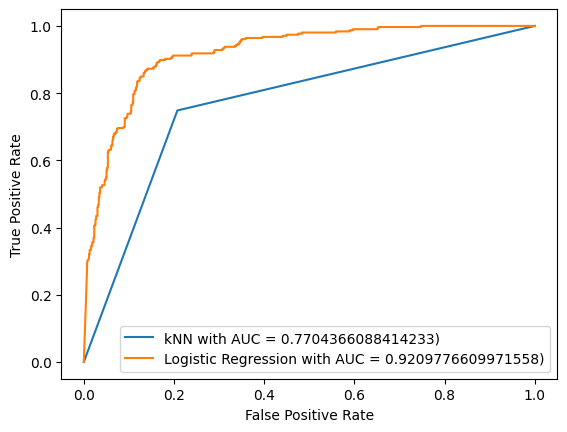

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Load data
x, y = load_data("emails.csv")

X_test = x[4000:5000]
Y_test = y[4000:5000]
X_train = x[0:4000]
Y_train = y[0:4000]

# Predicting with 5NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

knn_auc = roc_auc_score(Y_test, Y_pred_knn)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, Y_pred_knn)

# Predicting with logistic regression
logistic = LogisticRegression(learning_rate=0.02, num_steps=1000)
logistic.train(X_train, Y_train)
probs= logistic.get_probability(X_test)
log_auc = roc_auc_score(Y_test, probs)
log_fpr, log_tpr, _ = roc_curve(Y_test, probs)

# Plotting ROC curve
fig, ax = plt.subplots()
ax.plot(knn_fpr, knn_tpr, label=f'kNN with AUC = {knn_auc})')
ax.plot(log_fpr, log_tpr, label=f'Logistic Regression with AUC = {log_auc})')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()
